# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты
import torch
import numpy as np
from torch import nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torch import optim
from tqdm import tqdm

In [30]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True,  
                                             download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


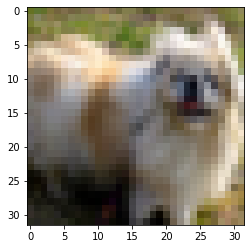

In [8]:
plt.imshow(train_dataset[40][0].permute(1, 2, 0).numpy())

In [31]:
len(list(train_dataset)), len(list(test_dataset))

(50000, 10000)

In [103]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        # Число нейронов в каждом слое
        shapes = [4 * hidden_dim, int(1.5 * hidden_dim), hidden_dim]
        self.fc1 = nn.Linear(input_dim, shapes[0])
        self.fc2 = nn.Linear(shapes[0], shapes[1])
        self.fc3 = nn.Linear(shapes[1], output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        return x
    
    def predict(self, x):
        x = self.forward(x)
        x = F.softmax(x)
        return x


net = Net(3072, 80, 10)

In [104]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [105]:
# Запустить обучение (по аналогии с тем, что делали на паре)
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.292
[1,   601] loss: 0.268


 10%|████████▎                                                                          | 1/10 [00:10<01:35, 10.65s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.253
[2,   601] loss: 0.248


 20%|████████████████▌                                                                  | 2/10 [00:21<01:25, 10.69s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.239
[3,   601] loss: 0.235


 30%|████████████████████████▉                                                          | 3/10 [00:32<01:15, 10.77s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.229
[4,   601] loss: 0.227


 40%|█████████████████████████████████▏                                                 | 4/10 [00:42<01:04, 10.76s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.224
[5,   601] loss: 0.222


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:53<00:54, 10.83s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.218
[6,   601] loss: 0.217


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:05<00:43, 11.00s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.212
[7,   601] loss: 0.214


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:16<00:33, 11.03s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.207
[8,   601] loss: 0.209


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:27<00:21, 10.94s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.205
[9,   601] loss: 0.205


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:37<00:10, 10.89s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.201
[10,   601] loss: 0.203


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:48<00:00, 10.87s/it]

Training is finished!
